Figura 2: grafico descrittivo dell'output di rMATS per ogni confronto. Quindi far vedere totale eventi sign e loro proporzioni (mettere a confronto i due comparisons?).
Mettere in risalto (forse conviene un grafico a parte) gli 85 ASEs condivisi e il loro deltaPSI (far capire che sono tutti opposti).

In [1]:
import pandas as pd

In [2]:
common_sig='common_SIG-splicing_events.txt'
bAmy_sig='splicing_events_bAmy_VS_CTR.txt'
CBNR20_sig='splicing_events_CBNR20-bAmy-vs-bAmy.txt'
common_not_sig='common_NOT-SIG-splicing_events.txt'
bAmy_not_sig='NOT-SIG-splicing_events_bAmy_VS_CTR.txt'
CBNR20_not_sig='NOT-SIG-splicing_events_CBNR20-bAmy-vs-bAmy.txt'

In [3]:
!ls common*txt

common_NOT-SIG-splicing_events.txt  common_SIG-splicing_events.txt


In [4]:
events=['A3SS','A5SS','SE','MXE','RI']
significance=['NS','S']
comparisons=['bAmy','COMMON','CBNR20']
stats_events= pd.DataFrame()

In [5]:
def getASE(significance,comparison,EV):
    D={('NS','CBNR20'): CBNR20_not_sig,('NS','bAmy'):bAmy_not_sig ,('S','bAmy'):bAmy_sig,('S','CBNR20'):CBNR20_sig,('NS','COMMON'): common_not_sig,('S','COMMON'): common_sig}
    file=D[(significance,comparison)]
    df=pd.read_csv(file,sep='\t')
    df=df[df['Class']==EV]
    df=df[df['DE-NOVO']==False]
    # Extract unique rows based on the first 13 columns
    unique_rows = df.iloc[:, :13].drop_duplicates()
    # If you want to keep the entire DataFrame but ensure uniqueness based on the first 13 columns:
    unique_rows_df = df.drop_duplicates(subset=df.columns[:13])
    return unique_rows_df.shape[0]
def getGenes(significance,comparison,EV):
    D={('NS','CBNR20'): CBNR20_not_sig,('NS','bAmy'):bAmy_not_sig ,('S','bAmy'):bAmy_sig,('S','CBNR20'):CBNR20_sig,('NS','COMMON'): common_not_sig,('S','COMMON'): common_sig}
    file=D[(significance,comparison)]
    df=pd.read_csv(file,sep='\t')
    df=df[df['Class']==EV]
    ngenes=len(df['GeneID'].unique())
    return ngenes

In [6]:
getASE('S','COMMON','MXE')

4

In [7]:
for e in events:
    for s in significance:
        for c in comparisons:
            col_name=s+'-'+c
            index=e
            n=getASE(s,c,e)
            stats_events.at[index,col_name]=n

In [8]:
stats_events.index.name = 'ASE'

In [9]:
stats_events.index.name

'ASE'

In [10]:
stats_events

,NS-bAmy,NS-COMMON,NS-CBNR20,S-bAmy,S-COMMON,S-CBNR20
ASE,,,,,,
A3SS,5512.0,4485.0,5156.0,44.0,9.0,49.0
A5SS,3437.0,2794.0,3215.0,17.0,4.0,35.0
SE,25682.0,19327.0,23733.0,240.0,54.0,262.0
MXE,3295.0,2342.0,2952.0,45.0,4.0,45.0
RI,4795.0,4280.0,4646.0,71.0,11.0,53.0


In [11]:
stats_events['Not_Significant-bAmy_vs_CTR']=stats_events['NS-bAmy']-stats_events['NS-COMMON']
stats_events['Not_Significant-CBNR20_vs_bAmy']=stats_events['NS-CBNR20']-stats_events['NS-COMMON']
stats_events['Not_Significant-Common']=stats_events['NS-COMMON']
stats_events['Not_Significant-Total']=stats_events['NS-bAmy']+stats_events['NS-CBNR20']-stats_events['NS-COMMON']
stats_events['A'+r'$\beta$'+'   vs    CTR']=stats_events['S-bAmy']-stats_events['S-COMMON']
stats_events['CBNR20+'+'A'+r'$\beta$'+'   vs   '+'A'+r'$\beta$']=stats_events['S-CBNR20']-stats_events['S-COMMON']
stats_events['Shared']=stats_events['S-COMMON']
stats_events['Significant-Total']=stats_events['S-bAmy']+stats_events['S-CBNR20']-stats_events['S-COMMON']

In [12]:
#ns_stats_events=stats_events[stats_events.columns[:4]].reset_index()
s_stats_events=stats_events[stats_events.columns[10:-1]].reset_index()

In [13]:
s_stats_events

,ASE,A$\beta$ vs CTR,CBNR20+A$\beta$ vs A$\beta$,Shared
0,A3SS,35.0,40.0,9.0
1,A5SS,13.0,31.0,4.0
2,SE,186.0,208.0,54.0
3,MXE,41.0,41.0,4.0
4,RI,60.0,42.0,11.0


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
#ns_df_melted = pd.melt(ns_stats_events, id_vars=['ID'], var_name='Comparison', value_name='Count')
s_df_melted = pd.melt(s_stats_events, id_vars=['ASE'], var_name='Comparison', value_name='Count')
s_df_melted 

,ASE,Comparison,Count
0,A3SS,A$\beta$ vs CTR,35.0
1,A5SS,A$\beta$ vs CTR,13.0
2,SE,A$\beta$ vs CTR,186.0
3,MXE,A$\beta$ vs CTR,41.0
4,RI,A$\beta$ vs CTR,60.0
5,A3SS,CBNR20+A$\beta$ vs A$\beta$,40.0
6,A5SS,CBNR20+A$\beta$ vs A$\beta$,31.0
7,SE,CBNR20+A$\beta$ vs A$\beta$,208.0
8,MXE,CBNR20+A$\beta$ vs A$\beta$,41.0
9,RI,CBNR20+A$\beta$ vs A$\beta$,42.0


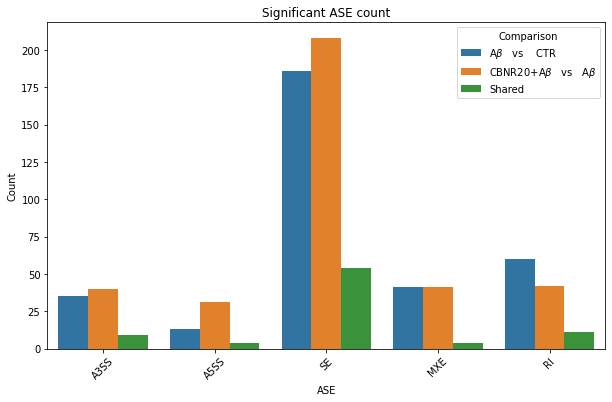

In [16]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=s_df_melted, x='ASE', y='Count', hue='Comparison')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.title('Significant ASE count')
plt.xlabel('ASE')
plt.ylabel('Count')
plt.legend(title='Comparison')
# Save the plot
plt.savefig('Significant_annotated_ASE_count.png', dpi=300)  # Save as PNG with 300 dpi
plt.show()